In [1]:
import pandas as pd
from random import random
import numpy as np
import pickle
from sklearn.neural_network import MLPClassifier

import matplotlib.pyplot as plt
from matplotlib.patches import Wedge, Arc
from tqdm import tqdm

import lib.draw as draw
from env.SoccerActionsEnv import SoccerActionsEnv

In [2]:
plt.rcParams['figure.figsize'] = (10.5,6.8)
plt.rcParams['figure.dpi'] = 500

In [3]:
# Define number of simulations run
n_runs = 10000

# Usage



To use the simulator, insert actions in the code example shown in the next cell. 


# Summon environment
## SoccerActionsEnv(STARTING_X_POSITION, STARTING_Y_POSITION, randomized_start=False)
env = SoccerActionsEnv(0.895, 0.5, randomized_start=False, end_on_xg=True)
env.reset()

# Initialize counters for stats
counter_shots = 0
counter_xgoals = 0.0
agent_set = []
# Run n_runs
for _ in range(n_runs):
    # Initalize agent
    ## sim.Agent(STARTING_X_POSITION, STARTING_Y_POSITION)
    agent = sim.Agent(0.895, 0.5)

    # INSERT ACTIONS HERE
    ## Use the following format
    ## if agent.end==False: agent.do_action(params)
    ## replace (params) with (action, r=radius, a=angle) OR (action, xt=xTarget, yt=yTarget) for passes and dribbles
    #### where action is either 'Pass' or 'Dribble'

    # Shot to end the simulation
    if agent.end == False:
        agent.do_shot()
        # Count how many times the simulation reached the shot
        counter_shots += 1
    # Count cummulative xgoals
    counter_xgoals += agent.xg
    # Save agent for visualizations
    agent_set.append(agent)
# Plot feedback
plt.text(75, 101, 'Game description', color = 'black',ha='center')
plt.text(75, 97, 'Runs ' + str(n_runs) + ' Shots ' + str(counter_shots) + ' XGoals ' + str(round(counter_xgoals,2)), color = 'black', ha='center')
sim.draw_play_from_agent_set(agent_set, dpi=500, plot_now=True)

## Portugal goal vs France

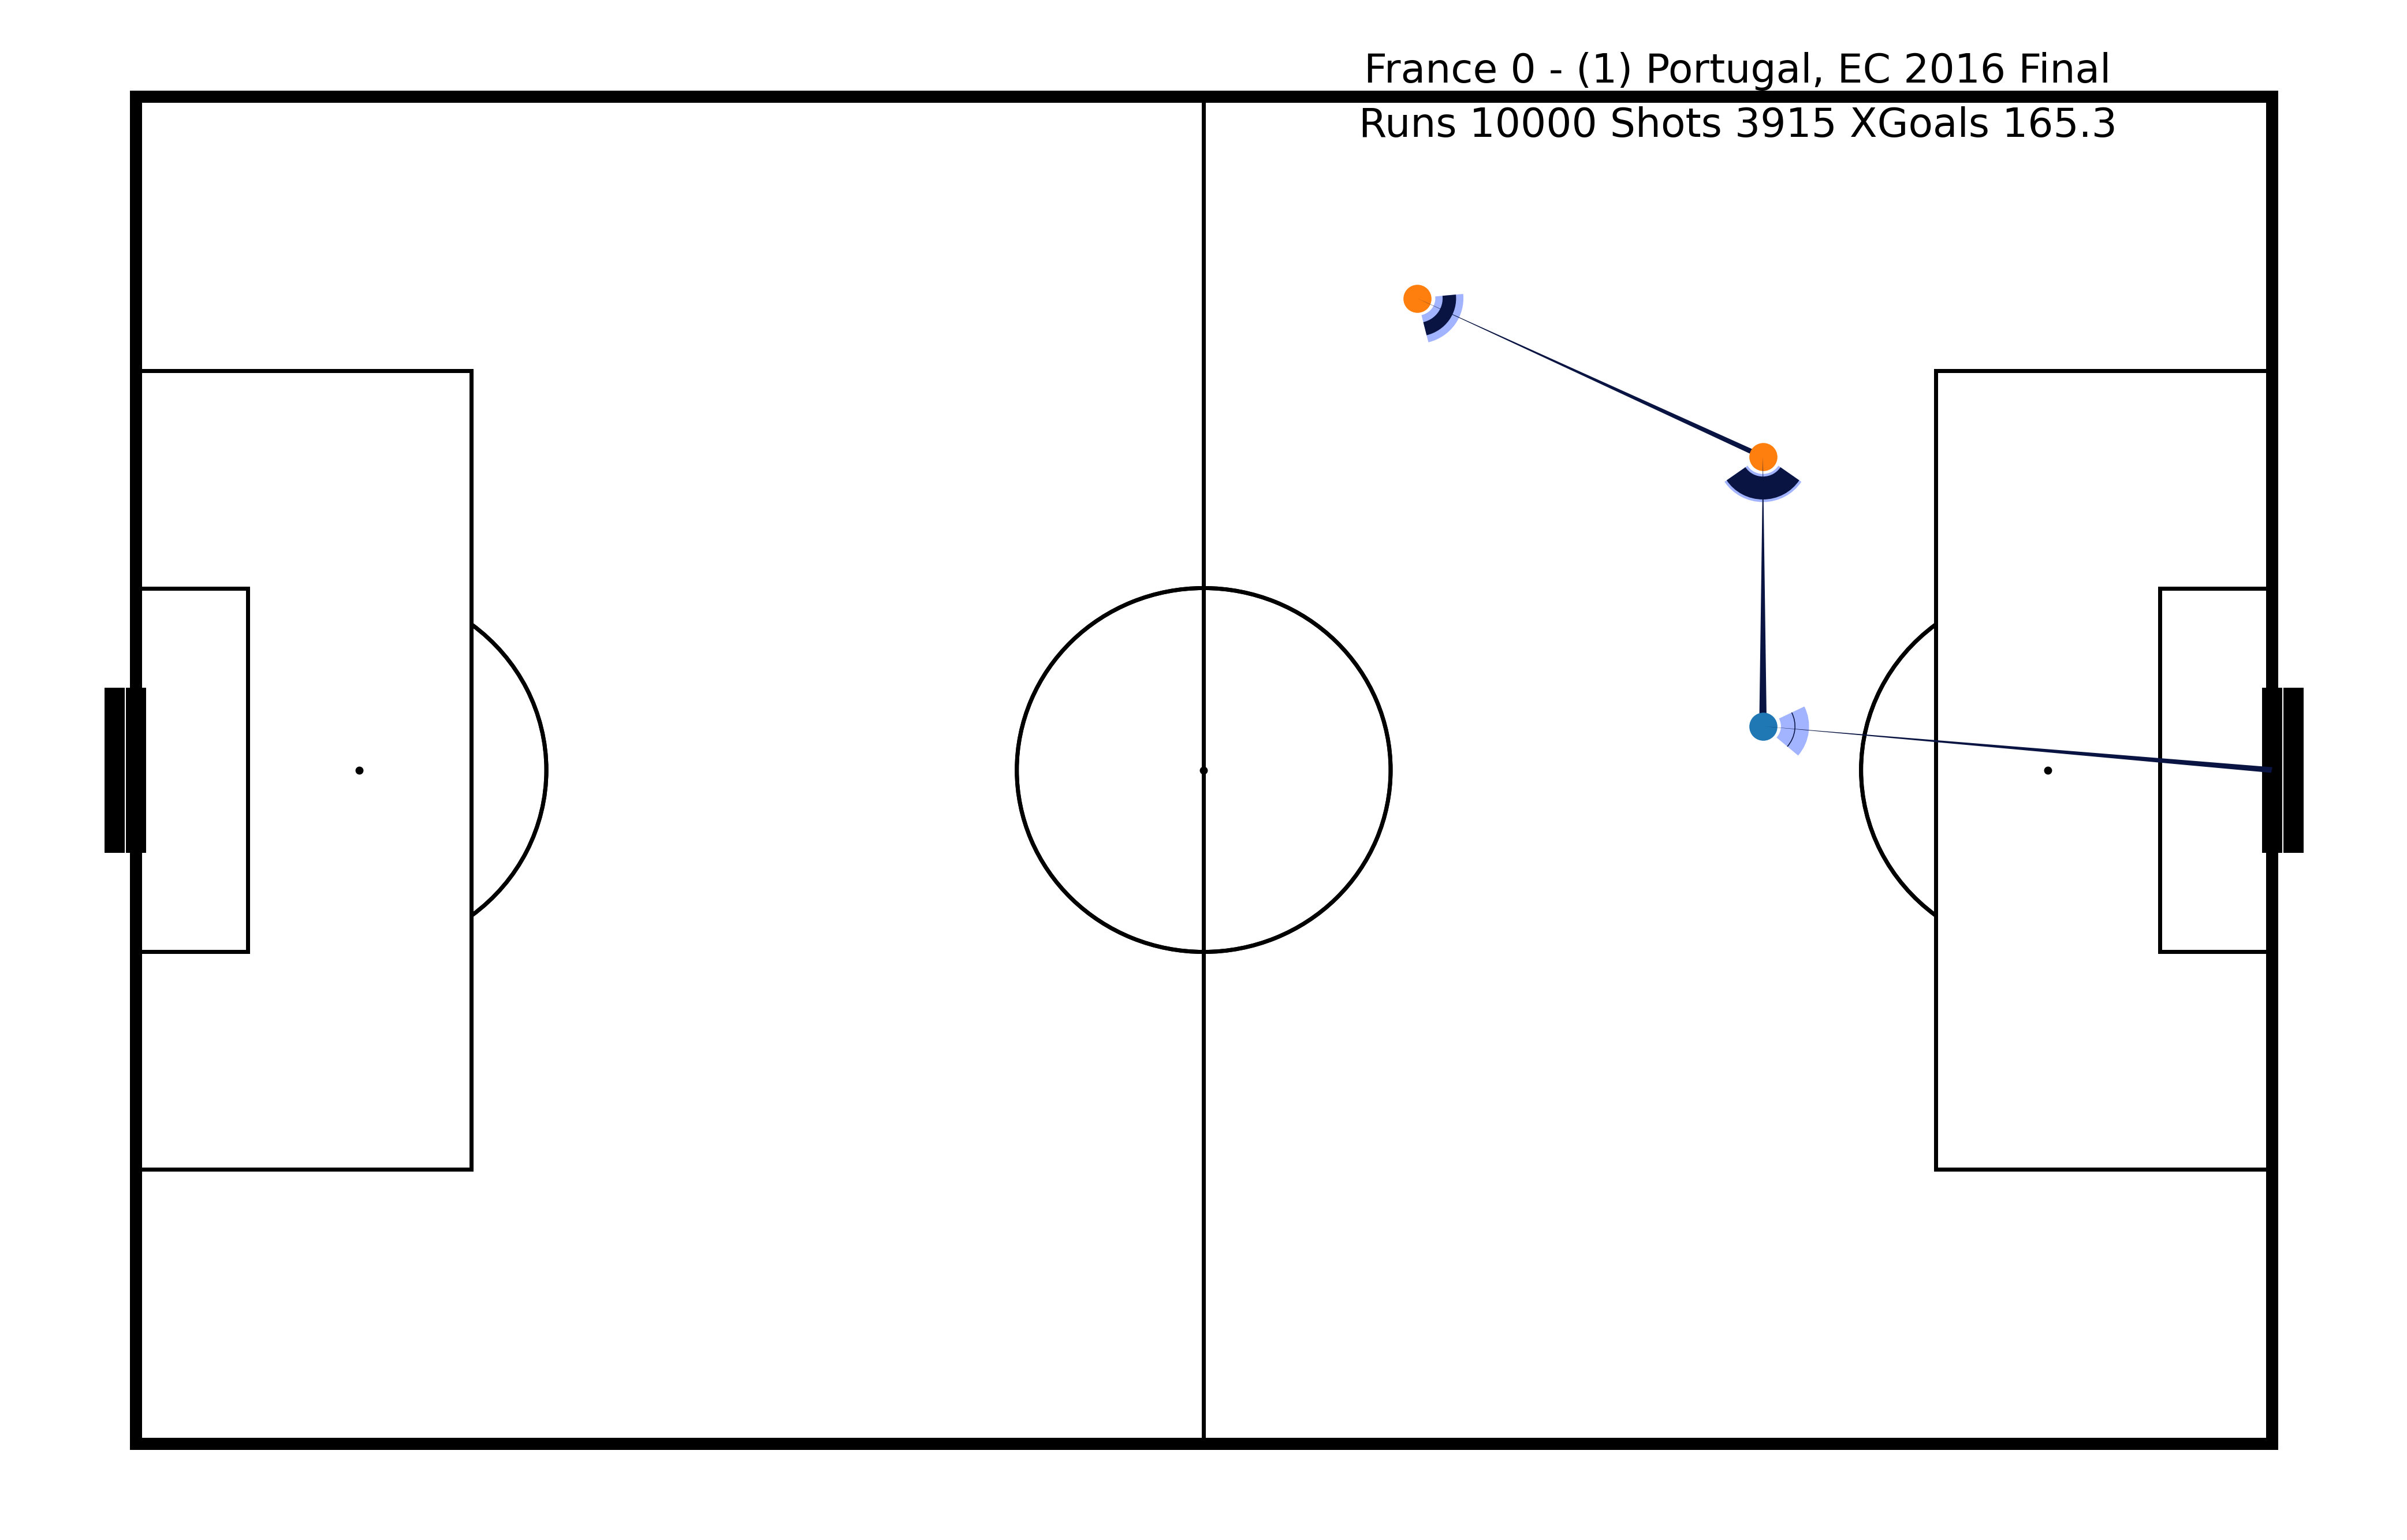

In [4]:
env = SoccerActionsEnv(0.60, 0.85, randomized_start=False, end_on_xg=True)

count_shots = 0
count_xgoals = 0.0
agent_set = []
all_runs_action_storage = []
for _ in range(n_runs):
    env.reset()

    if env.done == False: env.step([1, 0.2, 0.4])
    if env.done == False: env.step([1, 0.2, 0.25])

    if env.done == False:
        _,_,_,info = env.step([0, 0, 0])
        count_shots += 1
        count_xgoals += info['expectedGoals']

    all_runs_action_storage.append(env.action_storage)

plt.text(75, 101, 'France 0 - (1) Portugal, EC 2016 Final', color = 'black', ha='center')
plt.text(75, 97, 'Runs ' + str(n_runs) + ' Shots ' + str(count_shots) + ' XGoals ' + str(round(count_xgoals,2)), color = 'black', ha='center')
draw.plot_multiple_action_sequences(all_runs_action_storage)

## Spain goal vs Netherlands

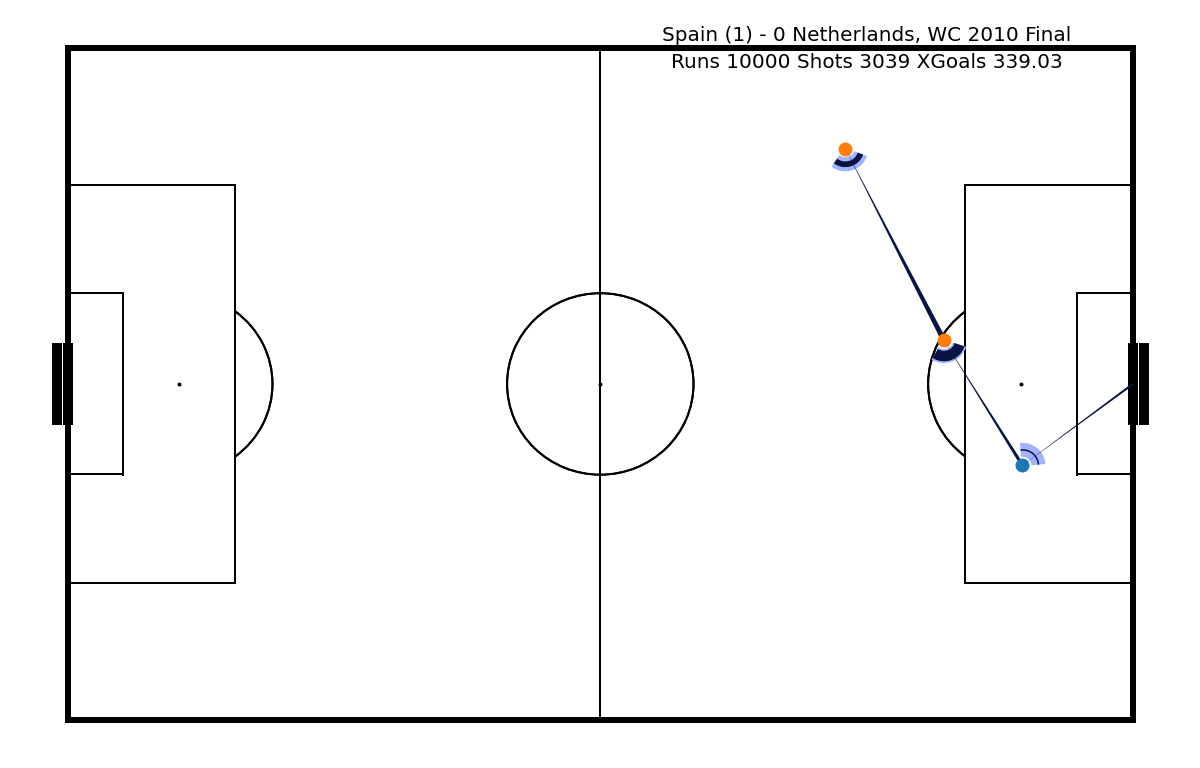

In [12]:
env = SoccerActionsEnv(0.73, 0.85, randomized_start=False, end_on_xg=True)

count_shots = 0
count_xgoals = 0.0
agent_set = []
all_runs_action_storage = []
for _ in range(n_runs):
    env.reset()

    if env.done == False: env.step([1, 0.30, 0.30])
    if env.done == False: env.step([1, 0.20, 0.31])

    if env.done == False:
        _,_,_,info = env.step([0, 0, 0])
        count_shots += 1
        count_xgoals += info['expectedGoals']

    all_runs_action_storage.append(env.action_storage)

plt.text(75, 101, 'Spain (1) - 0 Netherlands, WC 2010 Final', color = 'black', ha='center')
plt.text(75, 97, 'Runs ' + str(n_runs) + ' Shots ' + str(count_shots) + ' XGoals ' + str(round(count_xgoals,2)), color = 'black', ha='center')
draw.plot_multiple_action_sequences(all_runs_action_storage)

## Germany goal vs Argentina

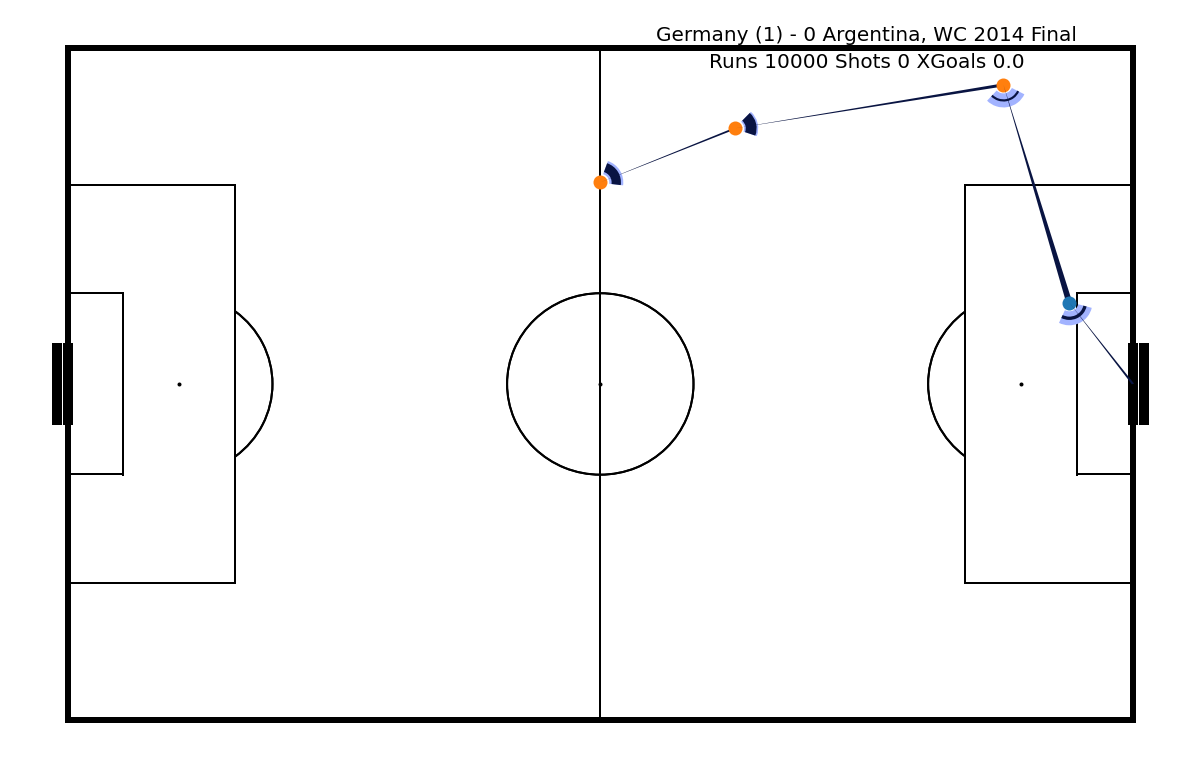

In [16]:
env = SoccerActionsEnv(0.50, 0.80, randomized_start=False, end_on_xg=True)

count_shots = 0
count_xgoals = 0.0
agent_set = []
all_runs_action_storage = []
for _ in range(n_runs):
    env.reset()

    if env.done == False: env.step([1, 0.15, 0.59])
    if env.done == False: env.step([1, 0.26, 0.54])
    if env.done == False: env.step([1, 0.33, 0.28])

    if env.done == False:
        _,_,_,info = env.step([0, 0, 0])
        count_shots += 1
        count_xgoals += info['expectedGoals']

    all_runs_action_storage.append(env.action_storage)

plt.text(75, 101, 'Germany (1) - 0 Argentina, WC 2014 Final', color = 'black', ha='center')
plt.text(75, 97, 'Runs ' + str(n_runs) + ' Shots ' + str(counter_shots) + ' XGoals ' + str(round(counter_xgoals,2)), color = 'black', ha='center')
draw.plot_multiple_action_sequences(all_runs_action_storage)